In [4]:
%cd ..
%load_ext autoreload
%autoreload 2

from fintools import *


C:\Users\dimitri\workspaces\opensource\finance-toolbox


## The Limits of Diversification

In [5]:
pwd

'C:\\Users\\dimitri\\workspaces\\opensource\\finance-toolbox'

In [8]:
# returns from 30 industries (equally weighted)
returns = load_industry_data('ind30_m_ew_rets.csv')/100
# Number of firms participating in each industry sector
firms = load_industry_data('ind30_m_nfirms.csv')
# Average size of industry sector
sizes = load_industry_data('ind30_m_size.csv')

In [9]:
#Compute Market Capitalization

market_cap = firms * sizes
market_cap.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76


<AxesSubplot:title={'center':'Markey Capitalization over Time'}>

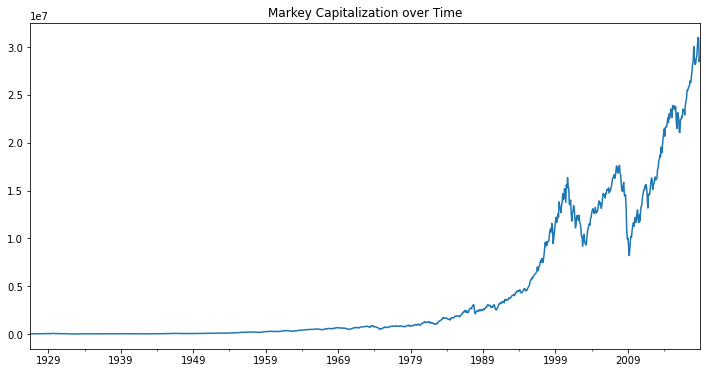

In [14]:
# Total market capitalization across all sectors
total_market_cap= market_cap.sum(axis='columns')
total_market_cap.plot(figsize=(12,6), title='Markey Capitalization over Time')

In [15]:
# Weight industries by Market cap every year
capitalization_weight = market_cap.divide(total_market_cap, axis='rows')
capitalization_weight.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521


<AxesSubplot:title={'center':'Markey Capitalization of Finance and Steel'}>

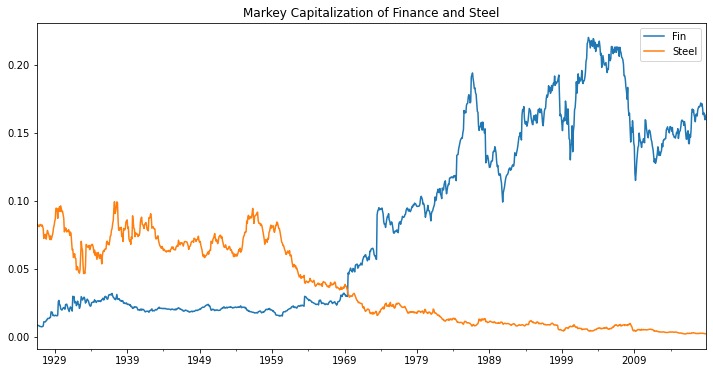

In [16]:
## See how industry importance changes over time
capitalization_weight[['Fin','Steel']].plot(figsize=(12,6), title='Markey Capitalization of Finance and Steel')

<AxesSubplot:title={'center':'Cap Weighted Portfolio of entire Market'}>

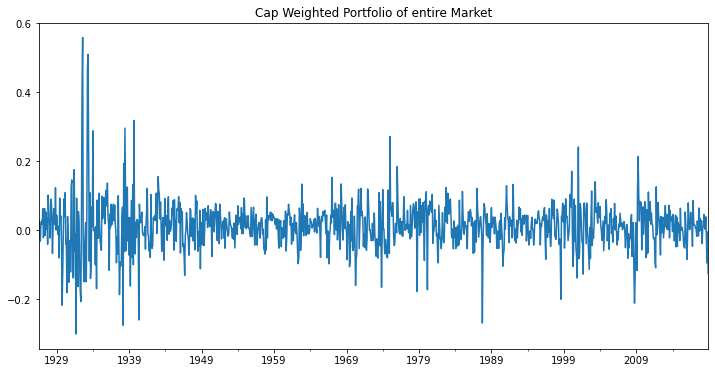

In [19]:
# Plot the returns of the Cap-weighted Portfolio
total_market_return = (capitalization_weight*returns).sum(axis='columns')
total_market_return.plot(figsize=(12,6), title='Cap Weighted Portfolio of entire Market')

<AxesSubplot:title={'center':'Market Index (initial value = $1000)'}>

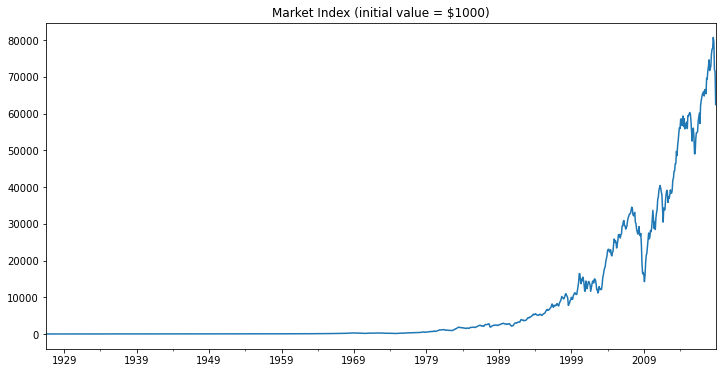

In [22]:
# Compute the Total Market Index of the Cap-Weighted portfolio and show the variation in wealt
drawdowns = compute_drawdown(total_market_return, initial_wealth=1)
total_market_index = drawdowns.wealth
total_market_index.plot(figsize=(12, 6), title='Market Index (initial value = $1000)')

<AxesSubplot:title={'center':'Market Index from 1980 with smoothing'}>

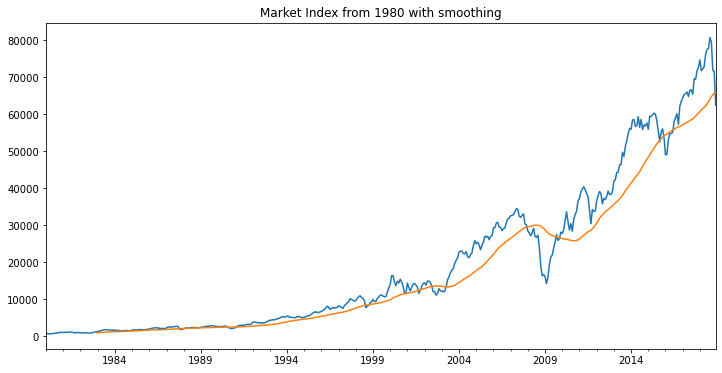

In [23]:
# Zoom into the 80s +
total_market_index["1980":].plot(figsize=(12, 6))
total_market_index["1980":].rolling(window=36).mean().plot(title='Market Index from 1980 with smoothing')

<AxesSubplot:title={'center':'Compound returns'}>

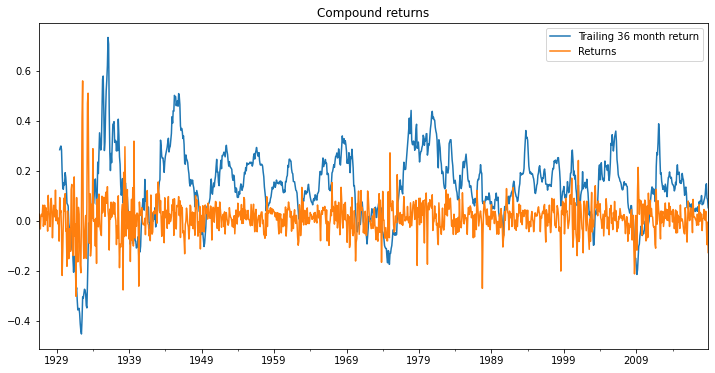

In [24]:
# Compound returns over rolling 36-month window
tmi_tr36rets = total_market_return.rolling(window=36).aggregate(annualize_returns, 12)
tmi_tr36rets.plot(figsize=(12,6), label="Trailing 36 month return", legend=True)
total_market_return.plot(label="Returns", legend=True, title='Compound returns')

## Rolling Correlation

In [26]:
# Compute rolling correlation of returns over 36 months
ts_corr = returns.rolling(window=36).corr()
# Produces a multi-index frame with corralation matrix for each date
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.616270  0.494486  0.182592  0.828794  0.782145  0.740774   
        Rtail  0.737708  0.465608  0.170350  0.819260  0.718729  0.749598   
        Meals  0.589524  0.437456  0.186983  0.715878  0.670806  0.538141   
        Fin    0.502855  0.384944 -0.027428  0.747228  0.804589  0.692634   
        Other  0.633037  0.574111  0.197281  0.838277  0.745089  0.731392   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.592395  0.754930  0.870098  0.738249  ...  0.694176   
        Rtail  0.750130  0.608635  0.667670  0.653690  ...  0.682784   
        Meals  0.627018  0.539283  0.602173  0.630618  ...  0.653396   
        Fin    0.459803  0.751061  0.835755  0.771931  ...  0.598434   
        Other  0.662258  0.734498  0.798904  0.725691  ...  0.733606   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.829612  0.830534  0.901867  0.866797  1.000000  0.801089   
        Rtail  0.699237  0.722465  0.785689  0.780918  0.801089  1.000000   
        Meals  0.698353  0.680376  0.711379  0.715732  0.736485  0.828575   
        Fin    0.777563  0.804540  0.812473  0.870492  0.846020  0.699813   
        Other  0.842887  0.867066  0.811629  0.785116  0.874068  0.790837   

                  Meals       Fin     Other  
2018-12 Whlsl  0.736485  0.846020  0.874068  
        Rtail  0.828575  0.699813  0.790837  
        Meals  1.000000  0.675388  0.741338  
        Fin    0.675388  1.000000  0.778229  
        Other  0.741338  0.778229  1.000000  

[5 rows x 30 columns]

In [27]:
#Name the indexes - 1st level is date, 2nd level industry
ts_corr.index.names = ['date','industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
date    industry                                                               
2018-12 Whlsl     0.616270  0.494486  0.182592  0.828794  0.782145  0.740774   
        Rtail     0.737708  0.465608  0.170350  0.819260  0.718729  0.749598   
        Meals     0.589524  0.437456  0.186983  0.715878  0.670806  0.538141   
        Fin       0.502855  0.384944 -0.027428  0.747228  0.804589  0.692634   
        Other     0.633037  0.574111  0.197281  0.838277  0.745089  0.731392   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
date    industry                                          ...             
2018-12 Whlsl     0.592395  0.754930  0.870098  0.738249  ...  0.694176   
        Rtail     0.750130  0.608635  0.667670  0.653690  ...  0.682784   
        Meals     0.627018  0.539283  0.602173  0.630618  ...  0.653396   
        Fin       0.459803  0.751061  0.835755  0.771931  ...  0.598434   
        Other     0.662258  0.734498  0.798904  0.725691  ...  0.733606   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
date    industry                                                               
2018-12 Whlsl     0.829612  0.830534  0.901867  0.866797  1.000000  0.801089   
        Rtail     0.699237  0.722465  0.785689  0.780918  0.801089  1.000000   
        Meals     0.698353  0.680376  0.711379  0.715732  0.736485  0.828575   
        Fin       0.777563  0.804540  0.812473  0.870492  0.846020  0.699813   
        Other     0.842887  0.867066  0.811629  0.785116  0.874068  0.790837   

                     Meals       Fin     Other  
date    industry                                
2018-12 Whlsl     0.736485  0.846020  0.874068  
        Rtail     0.828575  0.699813  0.790837  
        Meals     1.000000  0.675388  0.741338  
        Fin       0.675388  1.000000  0.778229  
        Other     0.741338  0.778229  1.000000  

[5 rows x 30 columns]

We want to compute the average overall correlation for each date

<AxesSubplot:title={'center':'Rolling Mean Correlation of Industry Returns'}, xlabel='date'>

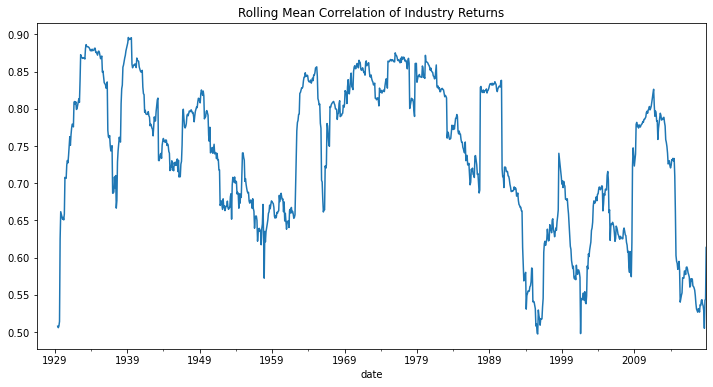

In [30]:
import matplotlib.pyplot as plt

# Group by date - compute mean overall corraltion for each date
ind_tr36corr = ts_corr.groupby(level='date').apply(lambda cor_matrix: cor_matrix.values.mean())
ind_tr36corr.plot(figsize=(12,6), title='Rolling Mean Correlation of Industry Returns')

Text(0.5, 1.0, 'Returns an Correlations')

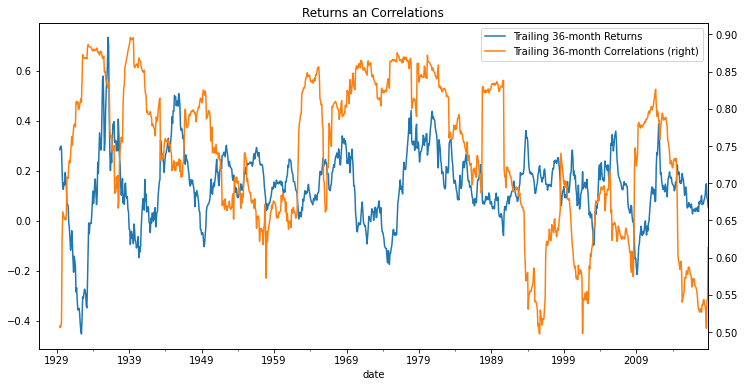

In [32]:
tmi_tr36rets.plot(label='Trailing 36-month Returns', figsize=(12,6), legend=True)
# use secondary y-axis to plot correlation units on the right
ind_tr36corr.plot(label='Trailing 36-month Correlations', figsize=(12,6), legend=True,
                    secondary_y=True)
plt.title('Returns an Correlations of returns')

### Moral of the Story: when market is down, correlations are increasing and vice versa

In [33]:
#returns are negatively correlated to correlations
tmi_tr36rets.corr(ind_tr36corr)

-0.15481428819018558